# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [2]:
# taking the random sample
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
3200,Belarus,1991,male,35-54 years,756,1217200,62.11,Belarus1991,NaN,"18,000,000,000",1899,Boomers
26511,United Kingdom,1987,female,5-14 years,3,3435125,0.09,United Kingdom1987,NaN,"745,162,608,269",13996,Generation X
15782,Maldives,2008,male,35-54 years,0,36569,0.00,Maldives2008,NaN,"2,271,646,188",7236,Boomers
274,Antigua and Barbuda,1985,male,55-74 years,0,2723,0.00,Antigua and Barbuda1985,NaN,"240,923,926",3850,G.I. Generation
9049,Finland,2012,male,5-14 years,0,299783,0.00,Finland2012,0.882,"256,706,466,091",50232,Generation Z


In [3]:
# taking the basic dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
# Renaming the column names
df = df.rename(columns = {"HDI for year": "HDI_for_year", "suicides/100k pop": "suicides/100k_pop", "country-year": "country_year"})
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country_year,HDI_for_year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.isnull().head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country_year,HDI_for_year,gdp_for_year ($),gdp_per_capita ($),generation
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False


In [6]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k_pop         0
country_year              0
HDI_for_year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
# Dropping the NaN values
df.dropna(1, inplace = True)

In [8]:
df.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k_pop     False
country_year          False
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [9]:
df.describe()

,year,suicides_no,population,suicides/100k_pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [10]:
df.shape

(27820, 11)

In [11]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country_year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [12]:
#df.set_index("year", inplace=True)

In [13]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country_year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [14]:
sumdata = df.groupby("year").sum()
sumdata.head()


,suicides_no,population,suicides/100k_pop,gdp_per_capita ($)
year,,,,
1985,116063,1008600086,6811.89,3508548
1986,120670,1029909613,6579.84,4104636
1987,126842,1095029726,7545.45,5645760
1988,121026,1054094424,7473.13,5870508
1989,160244,1225514347,8036.54,6068424


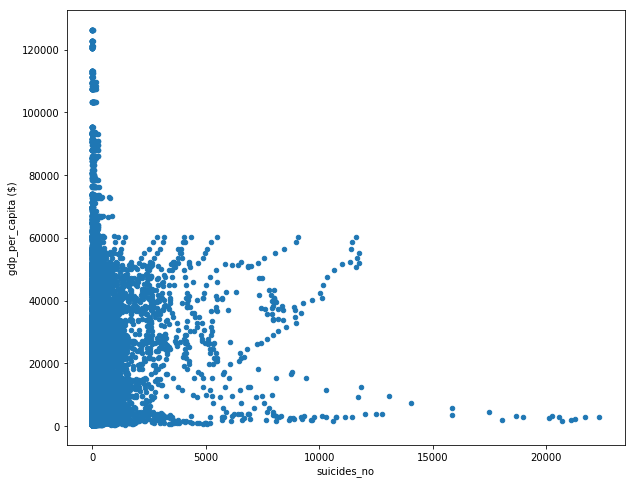

In [15]:
df.plot(kind = "scatter",x="suicides_no",y = "gdp_per_capita ($)", figsize=(10,8))
plt.show()

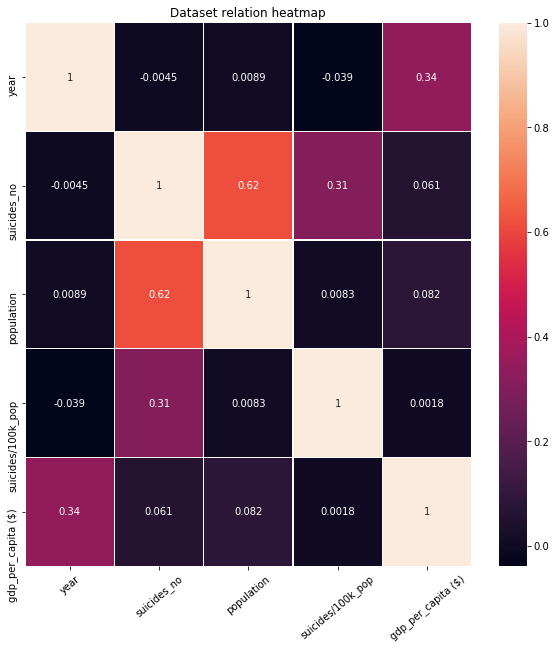

In [16]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths = 0.3)
plt.title('Dataset relation heatmap')
plt.xticks(rotation = 40)
plt.show()

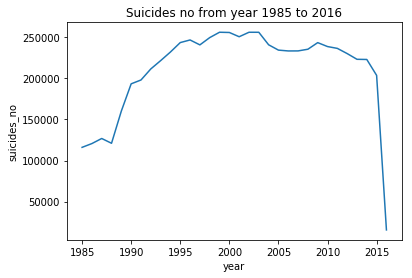

In [17]:
plt.title("Suicides no from year 1985 to 2016")
plt.xlabel("year")
plt.ylabel("suicides_no")
plt.plot(sumdata["suicides_no"])
plt.show()


In [18]:
#sns.scatterplot(x = "year", y = "suicides_no", data = df, hue = "sex")

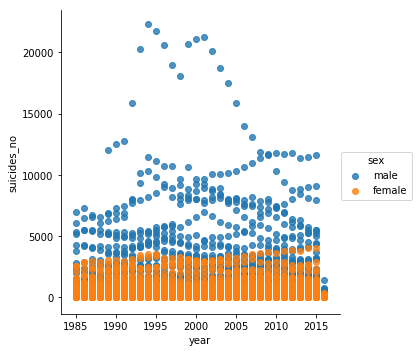

In [19]:
sns.lmplot("year", "suicides_no", data=df, hue='sex', fit_reg=False)

In [20]:
df["age"].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [21]:
age_data = df.groupby("age")["suicides_no"].sum()
age_data

age
15-24 years     808542
25-34 years    1123912
35-54 years    2452141
5-14 years       52264
55-74 years    1658443
75+ years       653118
Name: suicides_no, dtype: int64

In [22]:
age_data = pd.DataFrame(age_data)
age_data

,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


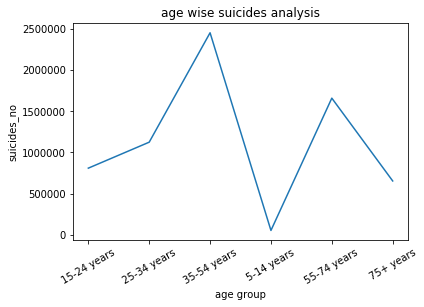

In [23]:
plt.plot(age_data["suicides_no"])
plt.title("age wise suicides analysis")
plt.xlabel("age group")
plt.ylabel("suicides_no")
plt.xticks(rotation=30)
plt.show()

In [24]:
sui_no = df.groupby(['country']).suicides_no.sum()
countries = []
for (i,j) in df.groupby('country'):
    countries.append(i)
countries = np.array(countries)

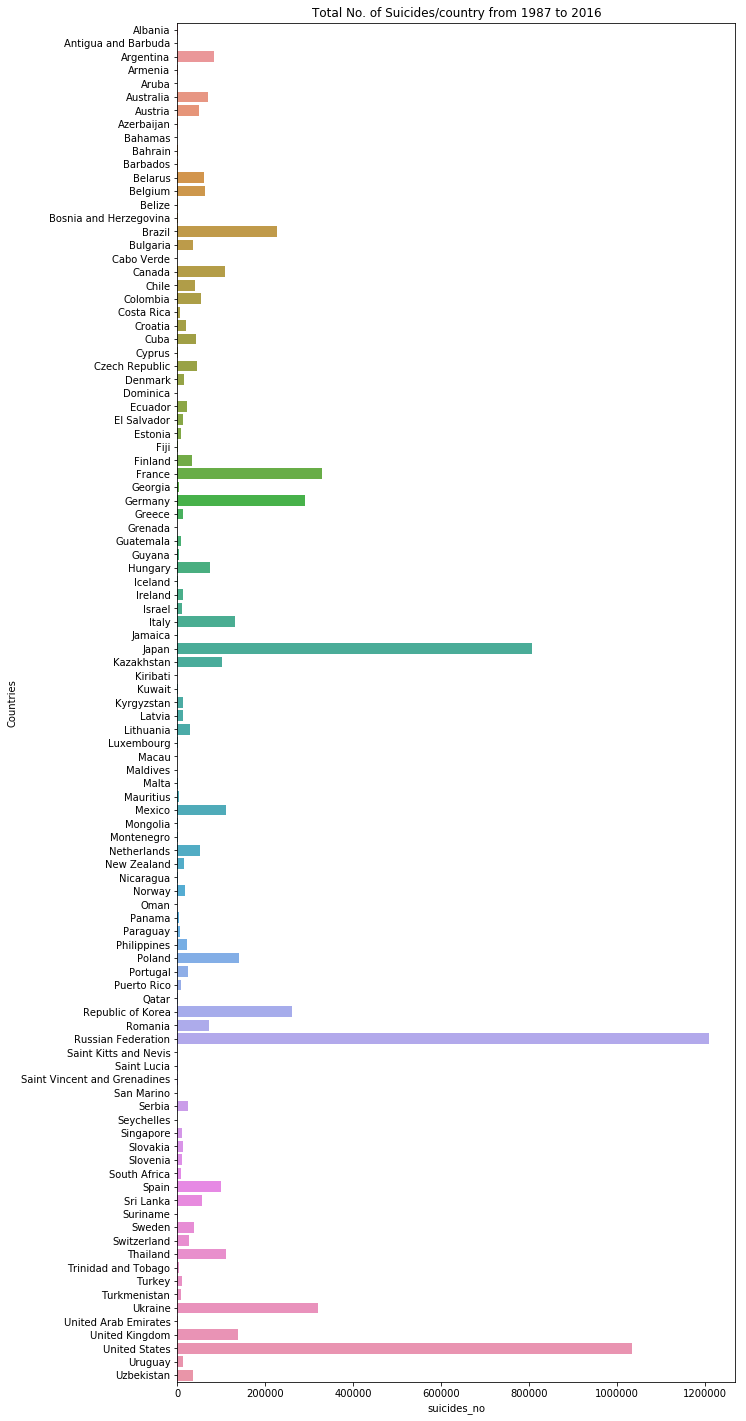

In [25]:
plt.figure(figsize = (10,25))
sns.barplot(y=countries, x=sui_no)
plt.xlabel('suicides_no')
plt.ylabel('Countries')
plt.title('Total No. of Suicides/country from 1987 to 2016')
plt.show()

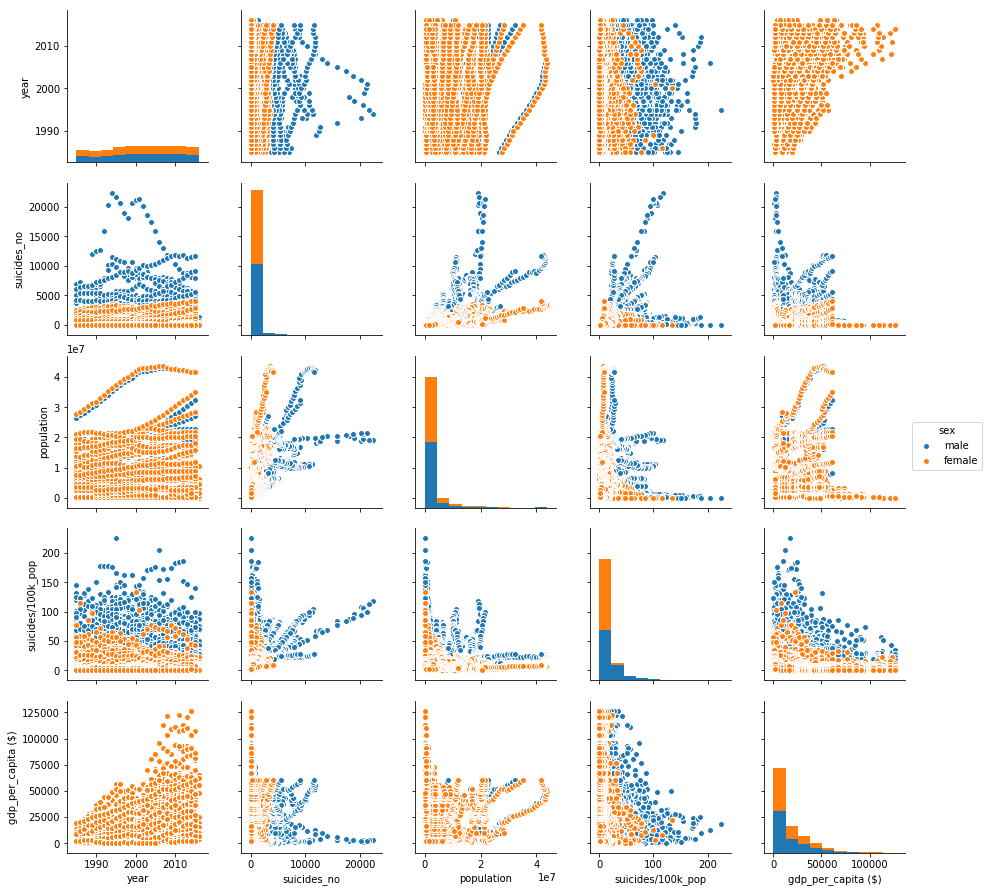

In [26]:
sns.pairplot(df, hue="sex")
plt.show()

In [27]:
country_sn = pd.DataFrame(df.groupby("country")["suicides/100k_pop"].sum())
country_sn.head()

,suicides/100k_pop
country,
Albania,924.76
Antigua and Barbuda,179.14
Argentina,3894.59
Armenia,976.21
Aruba,1596.52


In [28]:
country_sn_asc = country_sn.sort_values(by="suicides/100k_pop")
#test = country_sn.sort(by = "suicides/100k_pop", ascending=True)

In [29]:
country_sn_asc.head()

,suicides/100k_pop
country,
Dominica,0.00
Saint Kitts and Nevis,0.00
Oman,26.50
United Arab Emirates,94.89
Jamaica,106.44


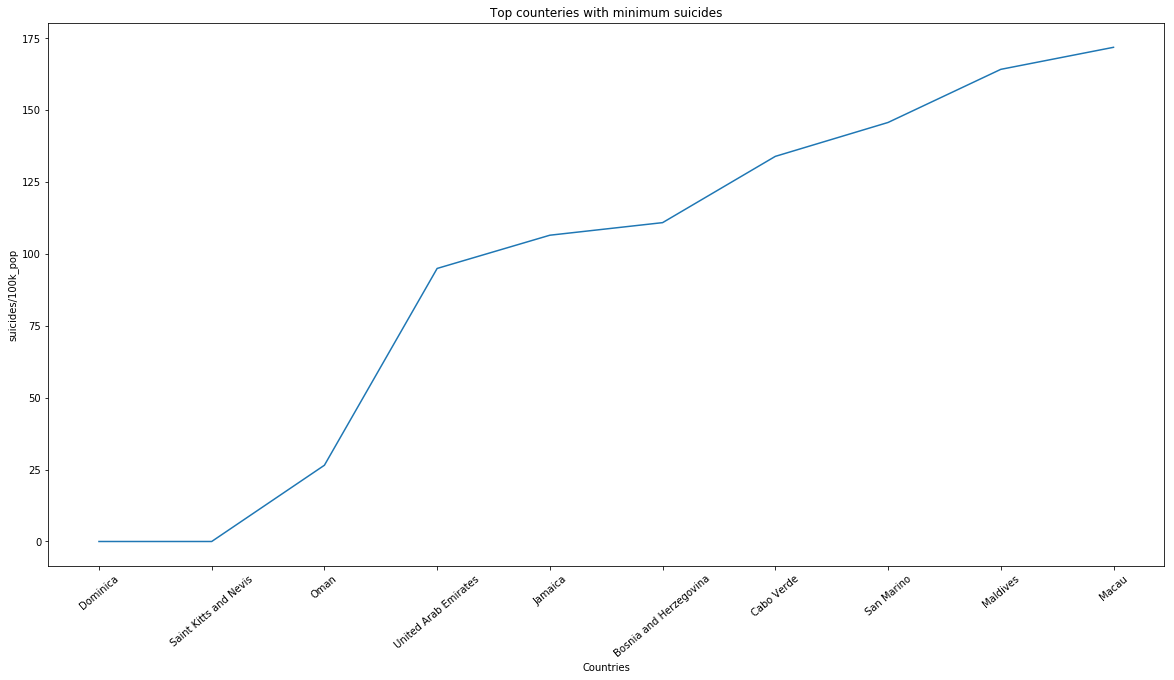

In [30]:
plt.figure(figsize = (20,10))
plt.plot(country_sn_asc["suicides/100k_pop"][:10])
plt.xlabel("Countries")
plt.ylabel("suicides/100k_pop")
plt.title("Top counteries with minimum suicides")
plt.xticks(rotation = 40)
plt.show()

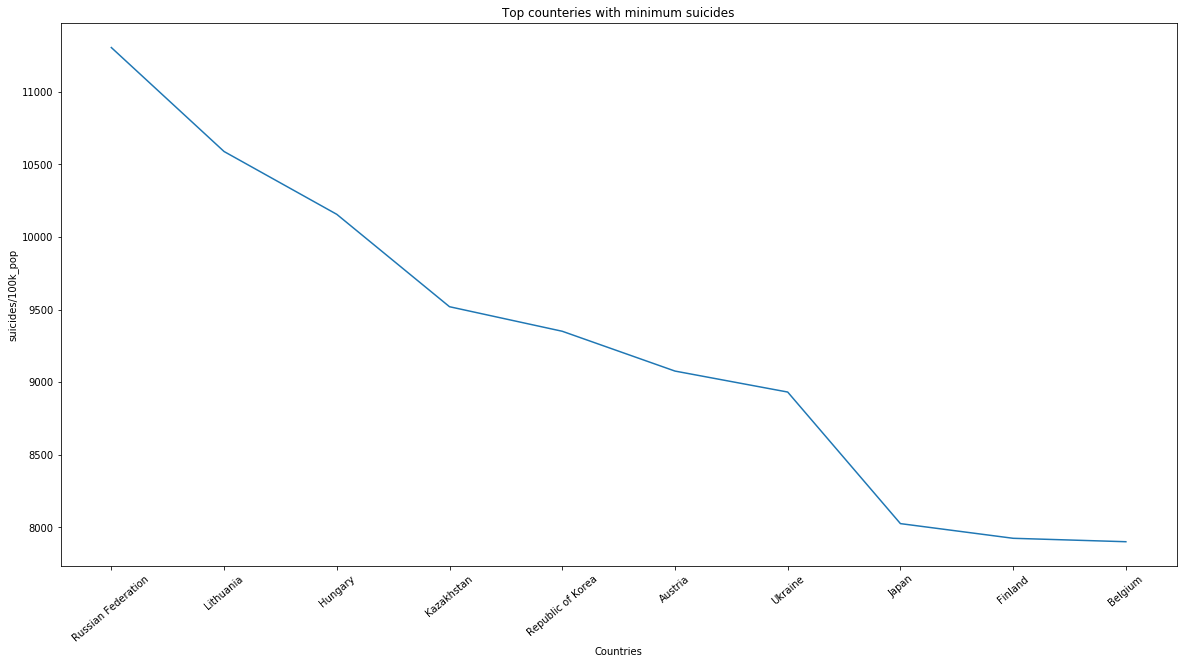

In [31]:
country_sn_dec = country_sn.sort_values(by="suicides/100k_pop", ascending = False)
plt.figure(figsize = (20,10))
plt.plot(country_sn_dec["suicides/100k_pop"][:10])
plt.xlabel("Countries")
plt.ylabel("suicides/100k_pop")
plt.title("Top counteries with minimum suicides")
plt.xticks(rotation = 40)
plt.show()